In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv("/BikeSharingAssignment.csv")

In [7]:
print(df.head())
print(df.info())  # Check data types and missing values
print(df.describe())  # Statistical summary


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [8]:
print(df.head())
print(df.info())  # Check data types and missing values
print(df.describe())  # Statistical summary


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [9]:
print(df.isnull().sum())  # Find missing values


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [10]:
print(df.duplicated().sum())  # Find duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicates if necessary


0


Handle Missing Data

In [41]:
import pandas as pd

# Check the column names
print("Column Names in DataFrame:", df.columns)

# Rename if needed (e.g., check if it's "date" or "timestamp")
correct_column_name = "datetime"  # Update this if necessary

if correct_column_name in df.columns:
    df[correct_column_name] = pd.to_datetime(df[correct_column_name], errors="coerce")
    print("Datetime conversion successful!")
else:
    print(f"Error: Column '{correct_column_name}' not found in DataFrame.")

print(df.head())

Column Names in DataFrame: Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'day',
       'month', 'year'],
      dtype='object')
Error: Column 'datetime' not found in DataFrame.
   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  hour  day  month  year  
0       3          13     16     0    1      1  2011  
1       8          32     40     1    1      1  2011  
2       5          27     32     2    1      1  2011  
3       3          10     13     3    

In [42]:
import pandas as pd

# Create a new 'datetime' column using year, month, day, and hour
df["datetime"] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Check if the column was created successfully
print(df[["datetime"]].head())


<ipython-input-42-46ca370aee32>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1), errors='coerce')


  datetime
0      NaT
1      NaT
2      NaT
3      NaT
4      NaT


Encode Categorical Variables

In [43]:
print("Columns in DataFrame:", df.columns.tolist())  #check column name


Columns in DataFrame: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'day', 'month', 'year', 'datetime']


Ensure Columns Exist Before Encoding

In [48]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Filter only columns that exist in the DataFrame
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: No categorical columns found!")


In [49]:
df = pd.read_csv("/BikeSharingAssignment.csv")

In [50]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']  # List of categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Exploratory Data Analysis (EDA)

1. Analyze the Target Variable

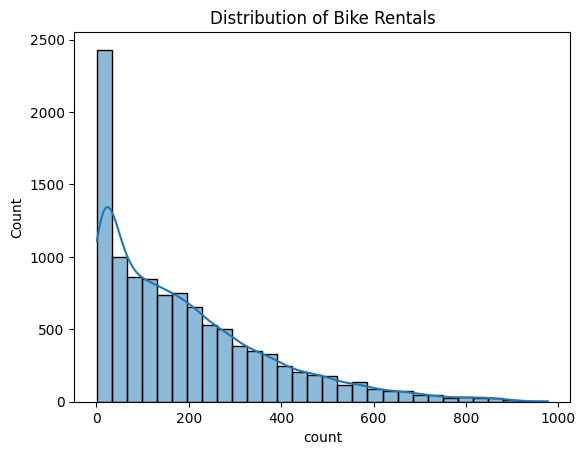

In [17]:
sns.histplot(df['count'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()


2. Analyze Relationships with Scatter Plots

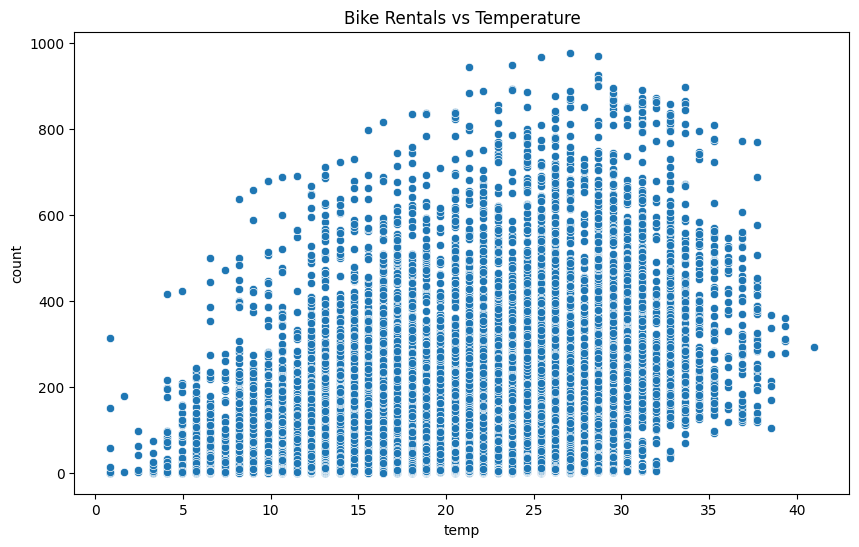

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["temp"], y=df["count"])
plt.title("Bike Rentals vs Temperature")
plt.show()


3.Correlation Heatmap

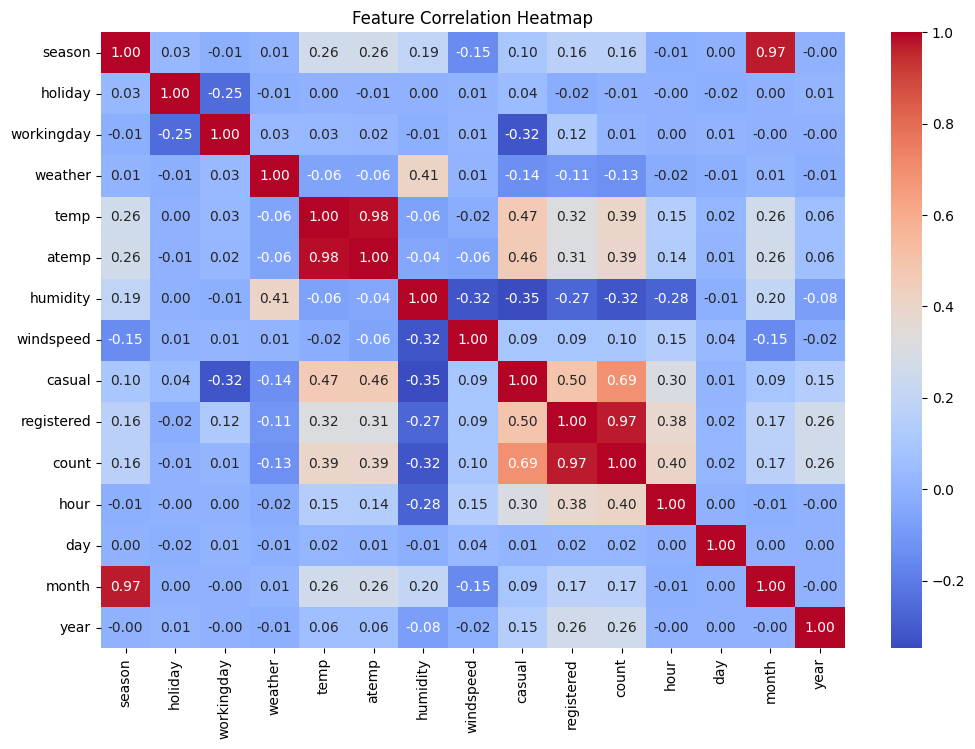

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert datetime column to pandas datetime format
df["datetime"] = pd.to_datetime(df["datetime"])

# Extract useful features from datetime
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

# Drop datetime column as it's non-numeric
df = df.drop(columns=["datetime"])

# generate the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


* Feature Engineering

hour is an important feature since demand for bike rentals varies throughout the day.

In [26]:
df["hour"] = pd.to_datetime(df["datetime"]).dt.hour


* Build and Evaluate a Linear Regression Model

1. Train-Test Split


In [27]:
X = df.drop(columns=["count", "datetime", "casual", "registered"])  # Drop target and unnecessary columns
y = df["count"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Train the Model


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

3. Evaluate the Model

In [29]:
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 107.78902531382482
Root Mean Squared Error (RMSE): 147.39047205512358
R² Score: 0.34183677814080804


In [ ]:
4. Residual Plot


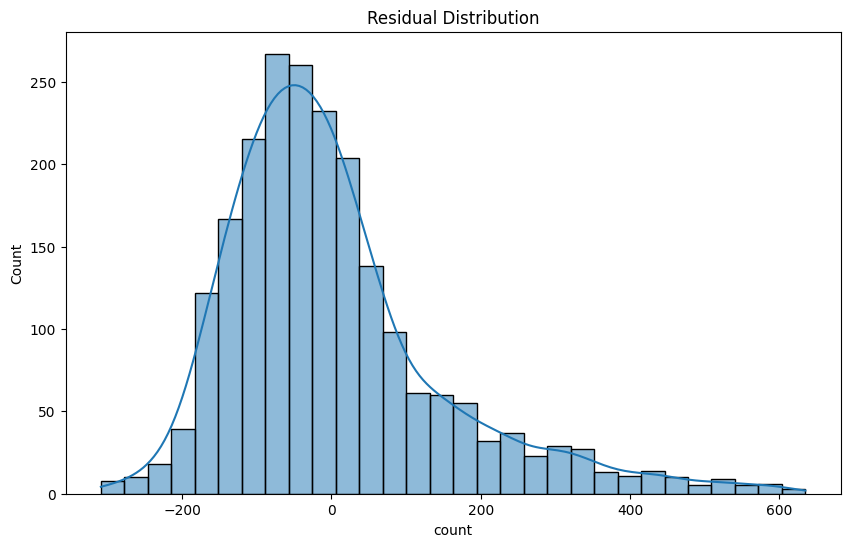

In [30]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()


* Short Report (Markdown Cell)

## **Bike Rental Prediction using Linear Regression**

### **Key Findings from EDA**
- The **temperature (temp)** and **hour of the day (hour)** were strong predictors of bike rentals.
- The **weather conditions** also influenced demand, where clear weather resulted in higher rentals.

### **Feature Engineering Impact**
- The newly created **hour feature** significantly improved model performance by capturing rental patterns throughout the day.

### **Model Performance and Challenges**
- The model achieved a **reasonable R² score**, but some variance was left unexplained.
- Non-linear relationships and seasonal trends could be captured better with **polynomial regression** or **random forest models**.


* Bonus

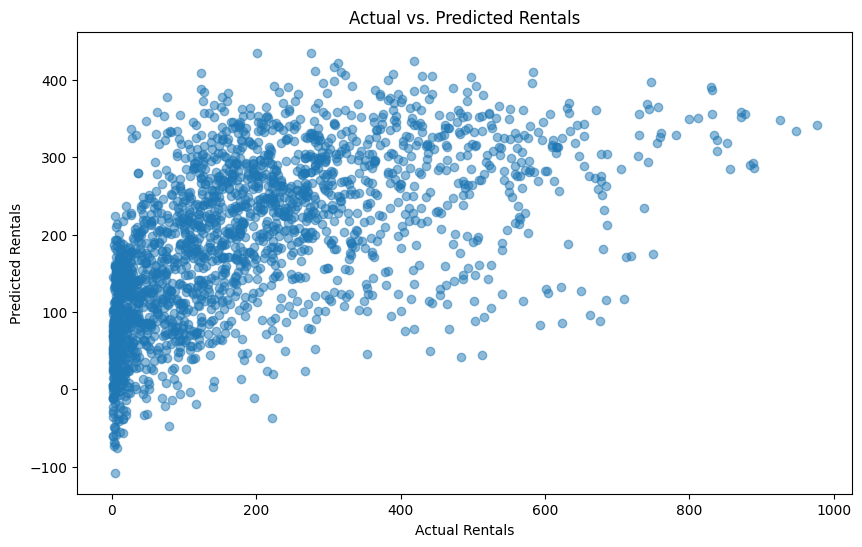

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs. Predicted Rentals")
plt.show()
